In [1]:
from solcore import material
from solcore.structure import Layer, Junction, TunnelJunction
from solcore.solar_cell import SolarCell
from solcore.solar_cell_solver import solar_cell_solver
from solcore.light_source import LightSource
import solcore.poisson_drift_diffusion as PDD

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def GaAs(i):
    GaAs_junction = Junction(
        [
            # Layer(width=10e-9, material=window_bottom, role="Window"),  #In width Nd
            Layer(width=float(i), material=n_GaAs, role="Emitter"),       #Nd width
            Layer(width=2000e-9, material=p_GaAs, role="Base"),         #Na width
            # Layer(width=200e-9, material=bsf_bottom, role="BSF"),       #Na In
        ],
        sn=1e6,
        sp=1e6,
        T=T,
        kind="PDD")
    # print(my_solar_cell)
    return GaAs_junction

In [3]:
T = 298
wl = np.linspace(350, 1050, 301) * 1e-9

In [4]:
window_bottom = material("GaInP")(T=T, Nd=5e24, In=0.49)    
n_GaAs = material("GaAs")(T=T, Nd=1e24)
p_GaAs = material("GaAs")(T=T, Na=8e22)
bsf_bottom = material("GaInP")(T=T, Na=5e24, In=0.49)

In [5]:
light_source = LightSource(
    source_type="standard",
    version="AM1.5g",
    x=wl,
    output_units="photon_flux_per_m",
    concentration=1,
)

1e-09
<Structure object
{'iv': None, 'labels': [None], 'T': 298, 'cell_area': 1, 'shading': 0, 'reflectivity': None, 'junctions': 1, 'junction_indices': [0], 'tunnel_indices': [], 'substrate': <'GaAs' material Nd=1e+24>, 'incidence': None, 'R_series': 0}
  <Junction object 
	{'sn': 1000000.0, 'sp': 1000000.0, 'T': 298, 'kind': 'PDD'}
	<Emitter layer 1.0nm <'GaAs' material Nd=1e+24>>
	<Base layer 2e+03nm <'GaAs' material Na=8e+22>>> >
Calculating RAT...
Calculating absorption profile...


Solving IV of the junctions...
Solving IV...
Processing structure...
...done!

Solving equilibrium...
...done!

...done!

Processing structure...
...done!

Solving equilibrium...
...done!

...done!

...done!

Solving IV of the tunnel junctions...
Solving IV of the total solar cell...
1.8957356524063794e-09
<Structure object
{'iv': None, 'labels': [None], 'T': 298, 'cell_area': 1, 'shading': 0, 'reflectivity': None, 'junctions': 1, 'junction_indices': [0], 'tunnel_indices': [], 'substrate': <'GaAs' material Nd=1e+24>, 'incidence': None, 'R_series': 0}
  <Junction object 
	{'sn': 1000000.0, 'sp': 1000000.0, 'T': 298, 'kind': 'PDD'}
	<Emitter layer 1.9nm <'GaAs' material Nd=1e+24>>
	<Base layer 2e+03nm <'GaAs' material Na=8e+22>>> >


c:\Users\usuwa\PycharmProjects\Solarcell\venv\lib\site-packages\solcore\analytic_solar_cells\IV.py:110: RuntimeWarning: invalid value encountered in scalar divide
  FF = Pmpp / (Isc * Voc)


Calculating RAT...
Calculating absorption profile...
Solving IV of the junctions...
Solving IV...
Processing structure...
...done!

Solving equilibrium...
...done!

...done!

Processing structure...
...done!

Solving equilibrium...
...done!

...done!

...done!

Solving IV of the tunnel junctions...
Solving IV of the total solar cell...
3.5938136638046257e-09
<Structure object
{'iv': None, 'labels': [None], 'T': 298, 'cell_area': 1, 'shading': 0, 'reflectivity': None, 'junctions': 1, 'junction_indices': [0], 'tunnel_indices': [], 'substrate': <'GaAs' material Nd=1e+24>, 'incidence': None, 'R_series': 0}
  <Junction object 
	{'sn': 1000000.0, 'sp': 1000000.0, 'T': 298, 'kind': 'PDD'}
	<Emitter layer 3.59nm <'GaAs' material Nd=1e+24>>
	<Base layer 2e+03nm <'GaAs' material Na=8e+22>>> >
Calculating RAT...
Calculating absorption profile...
Solving IV of the junctions...
Solving IV...
Processing structure...
...done!

Solving equilibrium...
...done!

...done!

Processing structure...
...done

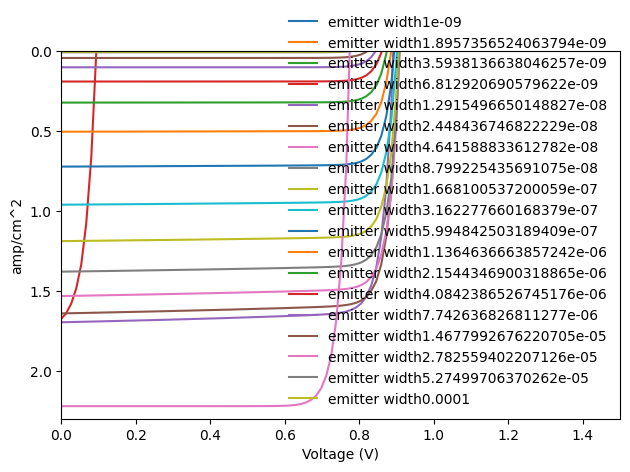

In [7]:
fig3, axIV = plt.subplots(1, 1)
num_con = 19
con = np.power(10, np.linspace(-9, -4, num_con))
vint = np.linspace(-2, 1, 300)
V = np.linspace(-2, 0, 150)
allI = []
isc = []
voc = []
FF = []
pmpp = []
emitter_width = []
for i in con:
    my_solar_cell = SolarCell([GaAs(i)],T=T,substrate=n_GaAs,)
    print(i)
    print(my_solar_cell)
    solar_cell_solver(my_solar_cell,"iv",
                user_options={
                    "light_source": light_source,
                    "wavelength": wl,
                    "optics_method": 'TMM',
                    "light_iv": True,
                    "mpp": True,
                    "voltages": V,
                    "internal_voltages": vint,
    },)
    isc.append(my_solar_cell.iv["Isc"])
    voc.append(my_solar_cell.iv["Voc"])
    FF.append(my_solar_cell.iv["FF"])
    pmpp.append(my_solar_cell.iv["Pmpp"])
    allI.append(my_solar_cell.iv["IV"][1])
    # And now, everything is plotting...
    emitter_width.append(i)
    axIV.plot(-V, my_solar_cell.iv["IV"][1] / -1e2, label=f'emitter width{i}')
axIV.legend(loc="lower right", frameon=False)
axIV.set_ylim(2.3, 0)
axIV.set_xlim(0, 1.5)
axIV.set_xlabel("Voltage (V)")
axIV.set_ylabel("amp/cm^2")
plt.tight_layout()

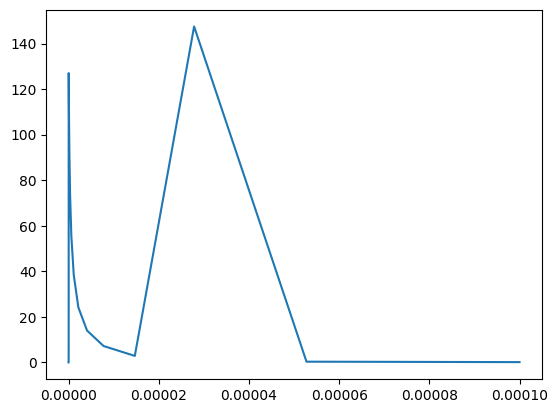

In [8]:
plt.plot(emitter_width,pmpp)

100000000000000.0
<Structure object
{'iv': None, 'labels': [None], 'T': 298, 'cell_area': 1, 'shading': 0, 'reflectivity': None, 'junctions': 1, 'junction_indices': [0], 'tunnel_indices': [], 'substrate': <'GaAs' material Na=8e+22>, 'incidence': None, 'R_series': 0}
  <Junction object 
	{'sn': 1000000.0, 'sp': 1000000.0, 'T': 298, 'kind': 'PDD'}
	<Emitter layer 1.5e+02nm <'GaAs' material Nd=100000000000000.0>>
	<Base layer 2e+03nm <'GaAs' material Na=8e+22>>> >
Calculating RAT...
Calculating absorption profile...
Solving IV of the junctions...
Solving IV...
Processing structure...
...done!

Solving equilibrium...
...done!

...done!

Processing structure...
...done!

Solving equilibrium...
...done!

...done!

...done!

Solving IV of the tunnel junctions...
Solving IV of the total solar cell...
1193776641714435.8
<Structure object
{'iv': None, 'labels': [None], 'T': 298, 'cell_area': 1, 'shading': 0, 'reflectivity': None, 'junctions': 1, 'junction_indices': [0], 'tunnel_indices': [], 'su

Text(0, 0.5, 'amp/cm^2')

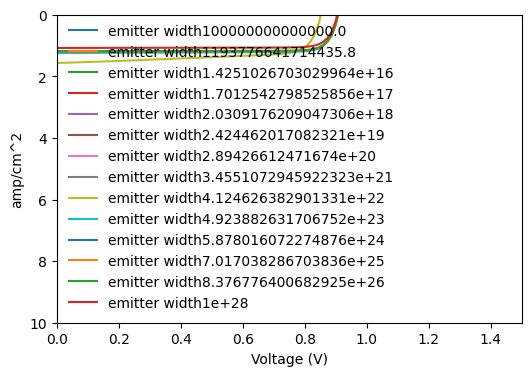

In [9]:
num_con = 14
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
con = np.power(10, np.linspace(14, 28, num_con))
isc2 = []
voc2 = []
FF2 = []
pmpp2 = []
allI2 = []
emitter_doped = []
for i in con:
    n_GaAs = material("GaAs")(T=T, Nd=i)
    GaAs_junction = Junction(
    [
        # Layer(width=10e-9, material=window_bottom, role="Window"),  #In width Nd
        Layer(width=150e-9, material=n_GaAs, role="Emitter"),       #Nd width
        Layer(width=2000e-9, material=p_GaAs, role="Base"),         #Na width
        # Layer(width=200e-9, material=bsf_bottom, role="BSF"),       #Na In
    ],
    sn=1e6,
    sp=1e6,
    T=T,
    kind="PDD")
    my_solar_cell = SolarCell([GaAs_junction],T=T,substrate=p_GaAs,)
    print(i)
    print(my_solar_cell)
    solar_cell_solver(my_solar_cell,"iv",
                user_options={
                    "light_source": light_source,
                    "wavelength": wl,
                    "optics_method": 'TMM',
                    "light_iv": True,
                    "mpp": True,
                    "voltages": V,
                    "internal_voltages": vint,
    },)
    isc2.append(my_solar_cell.iv["Isc"])
    voc2.append(my_solar_cell.iv["Voc"])
    FF2.append(my_solar_cell.iv["FF"])
    pmpp2.append(my_solar_cell.iv["Pmpp"])
    allI2.append(my_solar_cell.iv["IV"][1])
    emitter_doped.append(i)
    # And now, everything is plotting...
    ax.plot(-V, my_solar_cell.iv["IV"][1] / -1e2, label=f'emitter width{i}')
ax.legend(loc="lower left", frameon=False)
ax.set_ylim(10, 0)
ax.set_xlim(0, 1.5)
ax.set_xlabel("Voltage (V)")
ax.set_ylabel("amp/cm^2")

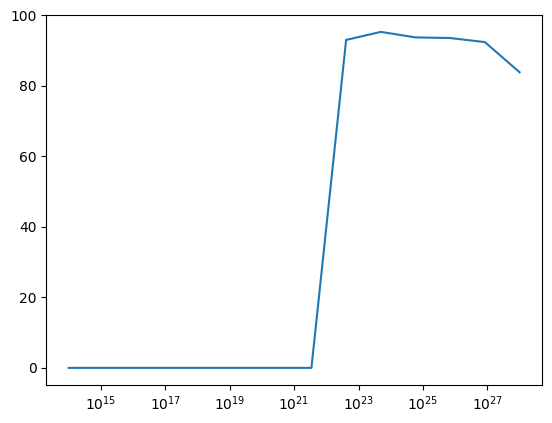

In [13]:
plt.plot(emitter_doped,pmpp2)
plt.xscale('log')

In [6]:
def solver_GaAs_for_sweep(Nd, width):
    n_GaAs = material("GaAs")(T=T, Nd=Nd)
    p_GaAs = material("GaAs")(T=T, Na=8e22)
    GaAs_junction = Junction(
    [
        # Layer(width=10e-9, material=window_bottom, role="Window"),  #In width Nd
        Layer(width=width, material=n_GaAs, role="Emitter"),       #Nd width
        Layer(width=2000e-9, material=p_GaAs, role="Base"),         #Na width
        # Layer(width=200e-9, material=bsf_bottom, role="BSF"),       #Na In
    ],
    T=T,
    kind="PDD")
    my_solar_cell = SolarCell([GaAs_junction],T=T,substrate=p_GaAs,)
    solar_cell_solver(my_solar_cell,"iv",
               user_options={
                   "light_source": light_source,
                   "wavelength": wl,
                   "optics_method": 'TMM',
                   "light_iv": True,
                   "mpp": True,
                   "voltages": V,
                   "internal_voltages": vint,
    },)  
    return my_solar_cell  


In [18]:
solver_GaAs_for_sweep(1e28,150e-9).iv["Pmpp"]

Solving IV of the junctions...
Solving IV...
Processing structure...
...done!

Solving equilibrium...
...done!

...done!

Processing structure...
...done!

Solving equilibrium...
...done!

...done!

...done!

Solving IV of the tunnel junctions...
Solving IV of the total solar cell...


130.31994418056433

In [19]:
def solver_GaAs_for_sweep2(Nd, width):
    n_GaAs = material("GaAs")(T=T, Nd=Nd)
    p_GaAs = material("GaAs")(T=T, Na=8e22)
    GaAs_junction = Junction(
    [
        # Layer(width=10e-9, material=window_bottom, role="Window"),  #In width Nd
        Layer(width=width, material=n_GaAs, role="Emitter"),       #Nd width
        Layer(width=2000e-9, material=p_GaAs, role="Base"),         #Na width
        # Layer(width=200e-9, material=bsf_bottom, role="BSF"),       #Na In
    ],
    T=T,
    kind="PDD")
    my_solar_cell = SolarCell([GaAs_junction],T=T,substrate=p_GaAs,)
    solar_cell_solver(my_solar_cell,"iv",
               user_options={
                   "light_source": light_source,
                   "wavelength": wl,
                   "optics_method": 'TMM',
                   "light_iv": True,
                   "mpp": True,
                   "voltages": V,
                   "internal_voltages": vint,
    },)  
    return my_solar_cell  


In [ ]:
solver_GaAs_for_sweep2(1e28,150e-9).iv["Pmpp"]

In [8]:
width_con = 14
doped_con = 19

con_width = np.power(10, np.linspace(-9, -4, width_con))
con_doped = np.power(10, np.linspace(14, 28, doped_con))
vint = np.linspace(-2, 1, 300)
V = np.linspace(-2, 0, 150)

isc_np = np.zeros((width_con, doped_con))
voc_np = np.zeros((width_con, doped_con))
FF_np = np.zeros((width_con, doped_con))
pmpp_np = np.zeros((width_con, doped_con))
# allI_np = np.zero((width_con, doped_con))
index = 0
N = width_con*doped_con
for i, doped in enumerate(con_doped):
    for j, width  in enumerate(con_width):
        my_solar_cell = solver_GaAs_for_sweep(doped, width)
        isc_np[i, j] =  my_solar_cell.iv["Isc"]
        voc_np[i, j] = my_solar_cell.iv["Voc"]
        FF_np[i, j] = my_solar_cell.iv["FF"]
        pmpp_np[i, j] = my_solar_cell.iv["Pmpp"]
        # allI_np[i, j] =my_solar_cell.iv["IV"][1]
        # emitter_width(ii)
        index += 1
        print('==============================\n')
        print(int(index / N * 100), "%\n")
        print('==============================\n')


Calculating RAT...
Calculating absorption profile...
Solving IV of the junctions...
Solving IV...
Processing structure...
...done!

Solving equilibrium...
...done!

...done!

Processing structure...
...done!

Solving equilibrium...
...done!

...done!

...done!

Solving IV of the tunnel junctions...
Solving IV of the total solar cell...

0 %


Calculating RAT...
Calculating absorption profile...


c:\Users\usuwa\PycharmProjects\Solarcell\venv\lib\site-packages\solcore\analytic_solar_cells\IV.py:110: RuntimeWarning: invalid value encountered in scalar divide
  FF = Pmpp / (Isc * Voc)


Solving IV of the junctions...
Solving IV...
Processing structure...
...done!

Solving equilibrium...
...done!

...done!

Processing structure...
...done!

Solving equilibrium...
...done!

...done!

...done!

Solving IV of the tunnel junctions...
Solving IV of the total solar cell...

0 %


Calculating RAT...
Calculating absorption profile...
Solving IV of the junctions...
Solving IV...
Processing structure...
...done!

Solving equilibrium...
...done!

...done!

Processing structure...
...done!

Solving equilibrium...
...done!

...done!

...done!

Solving IV of the tunnel junctions...
Solving IV of the total solar cell...

1 %


Calculating RAT...
Calculating absorption profile...
Solving IV of the junctions...
Solving IV...
Processing structure...
...done!

Solving equilibrium...
...done!

...done!

Processing structure...
...done!

Solving equilibrium...
...done!

...done!

...done!



KeyboardInterrupt: 

In [ ]:
from numpy import ma
from matplotlib import cm, ticker

X, Y = np.meshgrid(con_width, con_doped)
eff = pmpp_np / light_source.power_density * 100
eff = ma.masked_where(eff <= 0, eff)
fig2, axes = plt.subplots(2, 2, figsize=(11.25, 8))

cs1 = axes[0, 0].contourf(X, Y, eff, 100, cmap=cm.jet)
axes[0, 0].set_xlabel("width")
axes[0, 0].set_ylabel("doping concentration")
cbar1 = fig2.colorbar(cs1)

cs2 = axes[0, 1].contourf(X, Y, abs(isc_np), 100, cmap=cm.jet)
axes[0, 1].set_xlabel("Concentration (suns)")
axes[0, 1].set_ylabel("I$_{SC}$ (Am$^{-2}$)")
cbar2 = fig2.colorbar(cs2)


cs3 = axes[1, 0].contourf(X, Y, abs(voc_np), 100, cmap=cm.jet)
axes[1, 0].set_xlabel("Concentration (suns)")
axes[1, 0].set_ylabel("V$_{OC}$ (V)")
cbar3 = fig2.colorbar(cs3)

cs4 = axes[1, 1].contourf(X, Y, abs(FF_np) * 100, 100, cmap=cm.jet)
axes[1, 1].set_xlabel("Concentration (suns)")
axes[1, 1].set_ylabel("Fill Factor (%)")
cbar4 = fig2.colorbar(cs4)

plt.tight_layout()

In [ ]:
isc_np